In [16]:
% matplotlib inline

### Be nice to add some labels to this, to know which markers map where. 

In [7]:
def LEPmap_plotter(LEPmap_out, sex, length_measure = "D", N_LGs = 10, axis_offset = 10):
    
    """
    
    LEPmap_out        - Path to outfile of ordered markers in LGs from the "OrderMarkers" module of LEPmap
    sex               - Sex for which to plot map 1 = male, 2 = female, use 3 for sex-averaged maps. 
    length_measure    - Order linkage groups by number of SNPs in each LG "S" or by the distance "D"
    N_LGs             - Number of linkage groups to plot (will plot up to the Nth best LGs in terms of length)
    axis_offset       - Parameter to control the position of the linkage group labels. 
    
    """
    
    
    from matplotlib import pyplot as plt
    
    lmap = open(LEPmap_out, 'r').readlines()
    
    
    ## Get the data into easily accessible dictionaries

    Female_LGs = {}
    Male_LGs = {}

    for line in lmap:
        if line.startswith("#***") or line.startswith("***") :
            LG = line.split()[3]
            Male_LGs[LG] = []
            Female_LGs[LG] = []
        elif not line.startswith("#"):
            marker_number = line.split()[0]
            male_pos = float(line.split()[1])
            female_pos = float(line.split()[2])

            Male_LGs[LG].append((marker_number, male_pos))
            Female_LGs[LG].append((marker_number, female_pos)) 
            
    
    ## find the lengths of the LGs and order them 
    
    LG_length_SNP = []
    LG_length_distance = []

    if sex == 1:

        for LG in Male_LGs:
            LG_length_SNP.append((LG, len(Male_LGs[LG])))
            LG_length_distance.append((LG, max(Male_LGs[LG], key=lambda x: x[1])[1]))
    elif sex == 2:
        for LG in Female_LGs:
            LG_length_SNP.append((LG, len(Female_LGs[LG])))
            LG_length_distance.append((LG, max(Female_LGs[LG], key=lambda x: x[1])[1]))
        
    LG_length_SNP_sorted = sorted(LG_length_SNP, key=lambda x: x[1], reverse = True)
    LG_length_distance_sorted = sorted(LG_length_distance, key=lambda x: x[1], reverse = True)

    ## Get the N longest scaffolds

    plot_LGs_SNP_length = []
    plot_LGs_distance = []

    for i in LG_length_SNP_sorted[:N_LGs]:
        plot_LGs_SNP_length.append(i[0])

    for i in LG_length_distance_sorted[:N_LGs]:
        plot_LGs_distance.append(i[0])
        
    # And now plot 

    plt.figure(figsize=(15,15))
    plt.gca().invert_yaxis()
    plt.axis('off')
    
    N = 10
    LGcounter = 1
    
    if sex == 1:

        if length_measure == "D":

            for LG in plot_LGs_distance:
                x = [LGcounter]*len(Male_LGs[LG])
                y = [i[1] for i in Male_LGs[LG]]
                plt.plot(x,y, linewidth = 20, color = "grey", zorder=1)
                plt.scatter(x,y,zorder=2, marker= "_", s = 1000)
                plt.text(x[0],min(y)-axis_offset, "LG %s" % LG, horizontalalignment='center')
                LGcounter += 1

        elif length_measure == "S":

            for LG in plot_LGs_SNP_length:
                x = [LGcounter]*len(Male_LGs[LG])
                y = [i[1] for i in Male_LGs[LG]]
                plt.plot(x,y, linewidth = 20, color = "grey", zorder=1)
                plt.scatter(x,y,zorder=2, marker= "_", s = 1500)
                plt.text(x[0],min(y)-axis_offset, "LG %s" % LG, horizontalalignment='center')
                LGcounter += 1
    elif sex == 2:
        
        if length_measure == "D":

            for LG in plot_LGs_distance:
                x = [LGcounter]*len(Female_LGs[LG])
                y = [i[1] for i in Female_LGs[LG]]
                plt.plot(x,y, linewidth = 20, color = "grey", zorder=1)
                plt.scatter(x,y,zorder=2, marker= "_", s = 1000)
                plt.text(x[0],min(y)-axis_offset, "LG %s" % LG, horizontalalignment='center')
                LGcounter += 1

        elif length_measure == "S":

            for LG in plot_LGs_SNP_length:
                x = [LGcounter]*len(Female_LGs[LG])
                y = [i[1] for i in Female_LGs[LG]]
                plt.plot(x,y, linewidth = 20, color = "grey", zorder=1)
                plt.scatter(x,y,zorder=2, marker= "_", s = 1500)
                plt.text(x[0],min(y)-axis_offset, "LG %s" % LG, horizontalalignment='center')
                LGcounter += 1

### Finding my sex linked markers in this map!

LEPmap keeps the order . . . I think. So I need to get the order of the markers in the initial input file. These should then correspond to the marker number in the map.

In [8]:
import vcf

vcf_in = open("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Linkage_maps/Combined/batch_1.vcf.altered", 'r')

myvcf = vcf.Reader(vcf_in)

LOC_IDs = []

for record in myvcf:
    Loc_id = "%s_%s" % (record.ID, record.POS)
    LOC_IDs.append(Loc_id)
    
print LOC_IDs[:10]

['10_928', '38_3498', '53_4861', '65_5996', '67_6205', '89_8275', '89_8276', '90_8289', '92_8517', '105_9690']


In [9]:
Bv_XYs = open("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Linkage_maps/Combined/FAM_Bv_XYmarkers.txt",'r').readlines()
_93x94_XYs = open("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Linkage_maps/Combined/FAM_93x94_markers.txt",'r').readlines()
GR_96x97_XYs = open("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Linkage_maps/Combined/FAM_GR95x96_markers.txt",'r').readlines()

Bv_XYs = [i.strip() for i in Bv_XYs]
_93x94_XYs = [i.strip() for i in _93x94_XYs]
GR_96x97_XYs = [i.strip() for i in GR_96x97_XYs]

In [20]:
Loc_IDs_numbered = enumerate(LOC_IDs)

Bv_numbers = []
_93x94_numbers = []
GR_96x97_numbers = []

for locus in Loc_IDs_numbered:
    if locus[1] in Bv_XYs:
        Bv_numbers.append(locus[0])
    if locus[1] in _93x94_XYs:
        _93x94_numbers.append(locus[0])
    if locus[1] in GR_96x97_XYs:
        GR_96x97_numbers.append(locus[0])
        
All_numbers = set(Bv_numbers + GR_96x97_numbers + _93x94_numbers)

In [11]:
def Sexy_LEPmap_plotter(LEPmap_out, sex, Interesting_markers, length_measure = "D", N_LGs = 10, axis_offset = 10, plot_out_name = "LEP_map_plot.pdf"):
    
    """
    
    LEPmap_out        - Path to outfile of ordered markers in LGs from the "OrderMarkers" module of LEPmap
    sex               - Sex for which to plot map 1 = male, 2 = female, use 3 for both sna 4 for sex-averaged maps. 
    length_measure    - Order linkage groups by number of SNPs in each LG "S" or by the distance "D"
    N_LGs             - Number of linkage groups to plot (will plot up to the Nth best LGs in terms of length)
    axis_offset       - Parameter to control the position of the linkage group labels. 
    
    """
    
    
    from matplotlib import pyplot as plt
    import sys
    
    lmap = open(LEPmap_out, 'r').readlines()
    
    
    ## Get the data into easily accessible dictionaries

    Female_LGs = {}
    Male_LGs = {}

    for line in lmap:
        if line.startswith("#***") or line.startswith("***") :
            LG = line.split()[3]
            Male_LGs[LG] = []
            Female_LGs[LG] = []
        elif not line.startswith("#"):
            marker_number = line.split()[0]
            male_pos = float(line.split()[1])
            female_pos = float(line.split()[2])

            Male_LGs[LG].append((marker_number, male_pos))
            Female_LGs[LG].append((marker_number, female_pos)) 
            
    
    ## find the lengths of the LGs and order them 
    
    LG_length_SNP = []
    LG_length_distance = []
    
    if sex == 1:

        for LG in Male_LGs:
            LG_length_SNP.append((LG, len(Male_LGs[LG])))
            LG_length_distance.append((LG, max(Male_LGs[LG], key=lambda x: x[1])[1]))
    
    elif sex == 2:
        
        for LG in Female_LGs:
            LG_length_SNP.append((LG, len(Female_LGs[LG])))
            LG_length_distance.append((LG, max(Female_LGs[LG], key=lambda x: x[1])[1]))
            
    elif sex == 3:
        
        Male_LG_length_SNP = []
        Male_LG_length_distance = []
        
        Female_LG_length_SNP = []
        Female_LG_length_distance = []
        
        for LG in Male_LGs:
            Male_LG_length_SNP.append((LG, len(Male_LGs[LG])))
            Male_LG_length_distance.append((LG, max(Male_LGs[LG], key=lambda x: x[1])[1]))
        
        for LG in Female_LGs:
            Female_LG_length_SNP.append((LG, len(Female_LGs[LG])))
            Female_LG_length_distance.append((LG, max(Female_LGs[LG], key=lambda x: x[1])[1]))
        

        
        Male_LG_length_SNP_sorted = sorted(Male_LG_length_SNP, key=lambda x: x[1], reverse = True)
        Male_LG_length_distance_sorted = sorted(Male_LG_length_distance, key=lambda x: x[1], reverse = True)

        Female_LG_length_SNP_sorted = sorted(Female_LG_length_SNP, key=lambda x: x[1], reverse = True)
        Femle_LG_length_distance_sorted = sorted(Female_LG_length_distance, key=lambda x: x[1], reverse = True)
        
        Both_LG_length_SNP_sorted = Male_LG_length_SNP_sorted + Femle_LG_length_distance_sorted
        Both_LG_length_distance_sorted = Male_LG_length_distance_sorted + Femle_LG_length_distance_sorted

    LG_length_SNP_sorted = sorted(LG_length_SNP, key=lambda x: x[1], reverse = True)
    LG_length_distance_sorted = sorted(LG_length_distance, key=lambda x: x[1], reverse = True)

    
    ## Get the N longest scaffolds

    plot_LGs_SNP_length = []
    plot_LGs_distance = []

    if sex == 1 or sex == 2:

        for i in LG_length_SNP_sorted[:N_LGs]:
            plot_LGs_SNP_length.append(i[0])

        for i in LG_length_distance_sorted[:N_LGs]:
            plot_LGs_distance.append(i[0])
    
    elif sex == 3: ## No point doing "S" here, there will be no difference. 
        if length_measure == "S":
            sys.exit("Male and female will be the same for S, so not plotting")
        
        Male_plot_LGs_distance = []
        Female_plot_LGs_distance = []
        
        for i in Male_LG_length_SNP_sorted[:N_LGs]:
            Male_plot_LGs_distance.append(i[0])
            
            
        for i in Femle_LG_length_distance_sorted[:N_LGs]:
            Female_plot_LGs_distance.append(i[0])
        
        
    # And now plot 

    plt.figure(figsize=(40,30))
    plt.gca().invert_yaxis()
    plt.axis('off')
    
    N = 10
    LGcounter = 1
    Locus_counter = 0
    Male_Locus_counter = 0
    Female_Locus_counter = 0
    
    if sex == 1:


        if length_measure == "D":

            for LG in plot_LGs_distance:
                x = [LGcounter]*len(Male_LGs[LG])
                y = [i[1] for i in Male_LGs[LG]]
                z = [i for i in Male_LGs[LG]]
                plt.plot(x,y, linewidth = 20, color = "grey", zorder=1)
                plt.scatter(x,y,zorder=2, marker= "_", s = 1000)

                for loc in z:
                    if int(loc[0]) in Interesting_markers:
                        plt.scatter(x[0],loc[1],zorder=3, marker= "_", s = 2000, color = "red")

                plt.text(x[0],min(y)-axis_offset, "LG %s" % LG, horizontalalignment='center')
                Locus_counter += len(y)
                LGcounter += 1
            plt.title("Male linkage map, ordered by LG map length, Nloci = %s" % Locus_counter, fontsize = 20)
            
        elif length_measure == "S":

            for LG in plot_LGs_SNP_length:
                x = [LGcounter]*len(Male_LGs[LG])
                y = [i[1] for i in Male_LGs[LG]]
                z = [i for i in Male_LGs[LG]]
                plt.plot(x,y, linewidth = 20, color = "grey", zorder=1)
                plt.scatter(x,y,zorder=2, marker= "_", s = 1500)

                for loc in z:
                    if int(loc[0]) in Interesting_markers:
                        plt.scatter(x[0],loc[1],zorder=3, marker= "_", s = 2000, color = "red")

                plt.text(x[0],min(y)-axis_offset, "LG %s" % LG, horizontalalignment='center')
                LGcounter += 1
                Locus_counter += len(y)
            plt.title("Male linkage map, ordered by N snps in LG, Nloci = %s" % Locus_counter, fontsize = 20)
                
    elif sex == 2:
        if length_measure == "D":

            for LG in plot_LGs_distance:
                x = [LGcounter]*len(Female_LGs[LG])
                y = [i[1] for i in Female_LGs[LG]]
                z = [i for i in Female_LGs[LG]]
                plt.plot(x,y, linewidth = 20, color = "grey", zorder=1)
                plt.scatter(x,y,zorder=2, marker= "_", s = 1000)

                for loc in z:
                    if int(loc[0]) in Interesting_markers:
                        plt.scatter(x[0],loc[1],zorder=3, marker= "_", s = 2000, color = "red")

                plt.text(x[0],min(y)-axis_offset, "LG %s" % LG, horizontalalignment='center')
                
                LGcounter += 1
                Locus_counter += len(y)
            plt.title("Female linkage map, ordered by LG map length, Nloci = %s" % Locus_counter, fontsize = 20)

        elif length_measure == "S":

            for LG in plot_LGs_SNP_length:
                x = [LGcounter]*len(Female_LGs[LG])
                y = [i[1] for i in Female_LGs[LG]]
                z = [i for i in Female_LGs[LG]]
                plt.plot(x,y, linewidth = 20, color = "grey", zorder=1)
                plt.scatter(x,y,zorder=2, marker= "_", s = 1500)

                for loc in z:
                    if int(loc[0]) in Interesting_markers:
                        plt.scatter(x[0],loc[1],zorder=3, marker= "_", s = 2000, color = "red")

                plt.text(x[0],min(y)-axis_offset, "LG %s" % LG, horizontalalignment='center')
                                
                LGcounter += 1
                Locus_counter += len(y)
            plt.title("Female linkage map, ordered by N snps in LG, Nloci = %s" % Locus_counter, fontsize = 20)

    elif sex == 3:
        if length_measure == "D":

            for LG in Male_plot_LGs_distance:

                xM = [LGcounter]*(len(Male_LGs[LG]))
                yM = [i[1] for i in Male_LGs[LG]]
                zM = [i for i in Male_LGs[LG]]
                

                plt.plot(xM,yM, linewidth = 20, color = "grey", zorder=1)
                plt.scatter(xM,yM,zorder=2, marker= "_", s = 1000)
                
                for loc in zM:
                    if int(loc[0]) in Interesting_markers:
                        plt.scatter(xM[0],loc[1],zorder=3, marker= "_", s = 2000, color = "red")

                plt.text(xM[0],min(yM)-axis_offset, "LG %s" % LG, horizontalalignment='center')
            
                LGcounter += 1
                Male_Locus_counter += len(yM)
                
            LGcounter += 1 ## add a space
            
            for LG in Female_plot_LGs_distance:

                xF = [LGcounter]*(len(Female_LGs[LG]))
                yF = [i[1] for i in Female_LGs[LG]]
                zF = [i for i in Female_LGs[LG]]

                plt.plot(xF,yF, linewidth = 20, color = "grey", zorder=1)
                plt.scatter(xF,yF,zorder=2, marker= "_", s = 1000)

                for loc in zF:
                    if int(loc[0]) in Interesting_markers:
                        plt.scatter(xF[0],loc[1],zorder=3, marker= "_", s = 2000, color = "red")

                plt.text(xF[0],min(yF)-axis_offset, "LG %s" % LG, horizontalalignment='center')
                
                LGcounter += 1
                
                Female_Locus_counter += len(yF)
                
            plt.title("Male and Female linkage maps, ordered by LG map length, Nloci_Male = %s, Nloci_Female = %s" % (Male_Locus_counter, Female_Locus_counter), fontsize = 20)
                
    plt.savefig("%s/%s" % (LEPmap_out.rpartition("/")[0], plot_out_name))


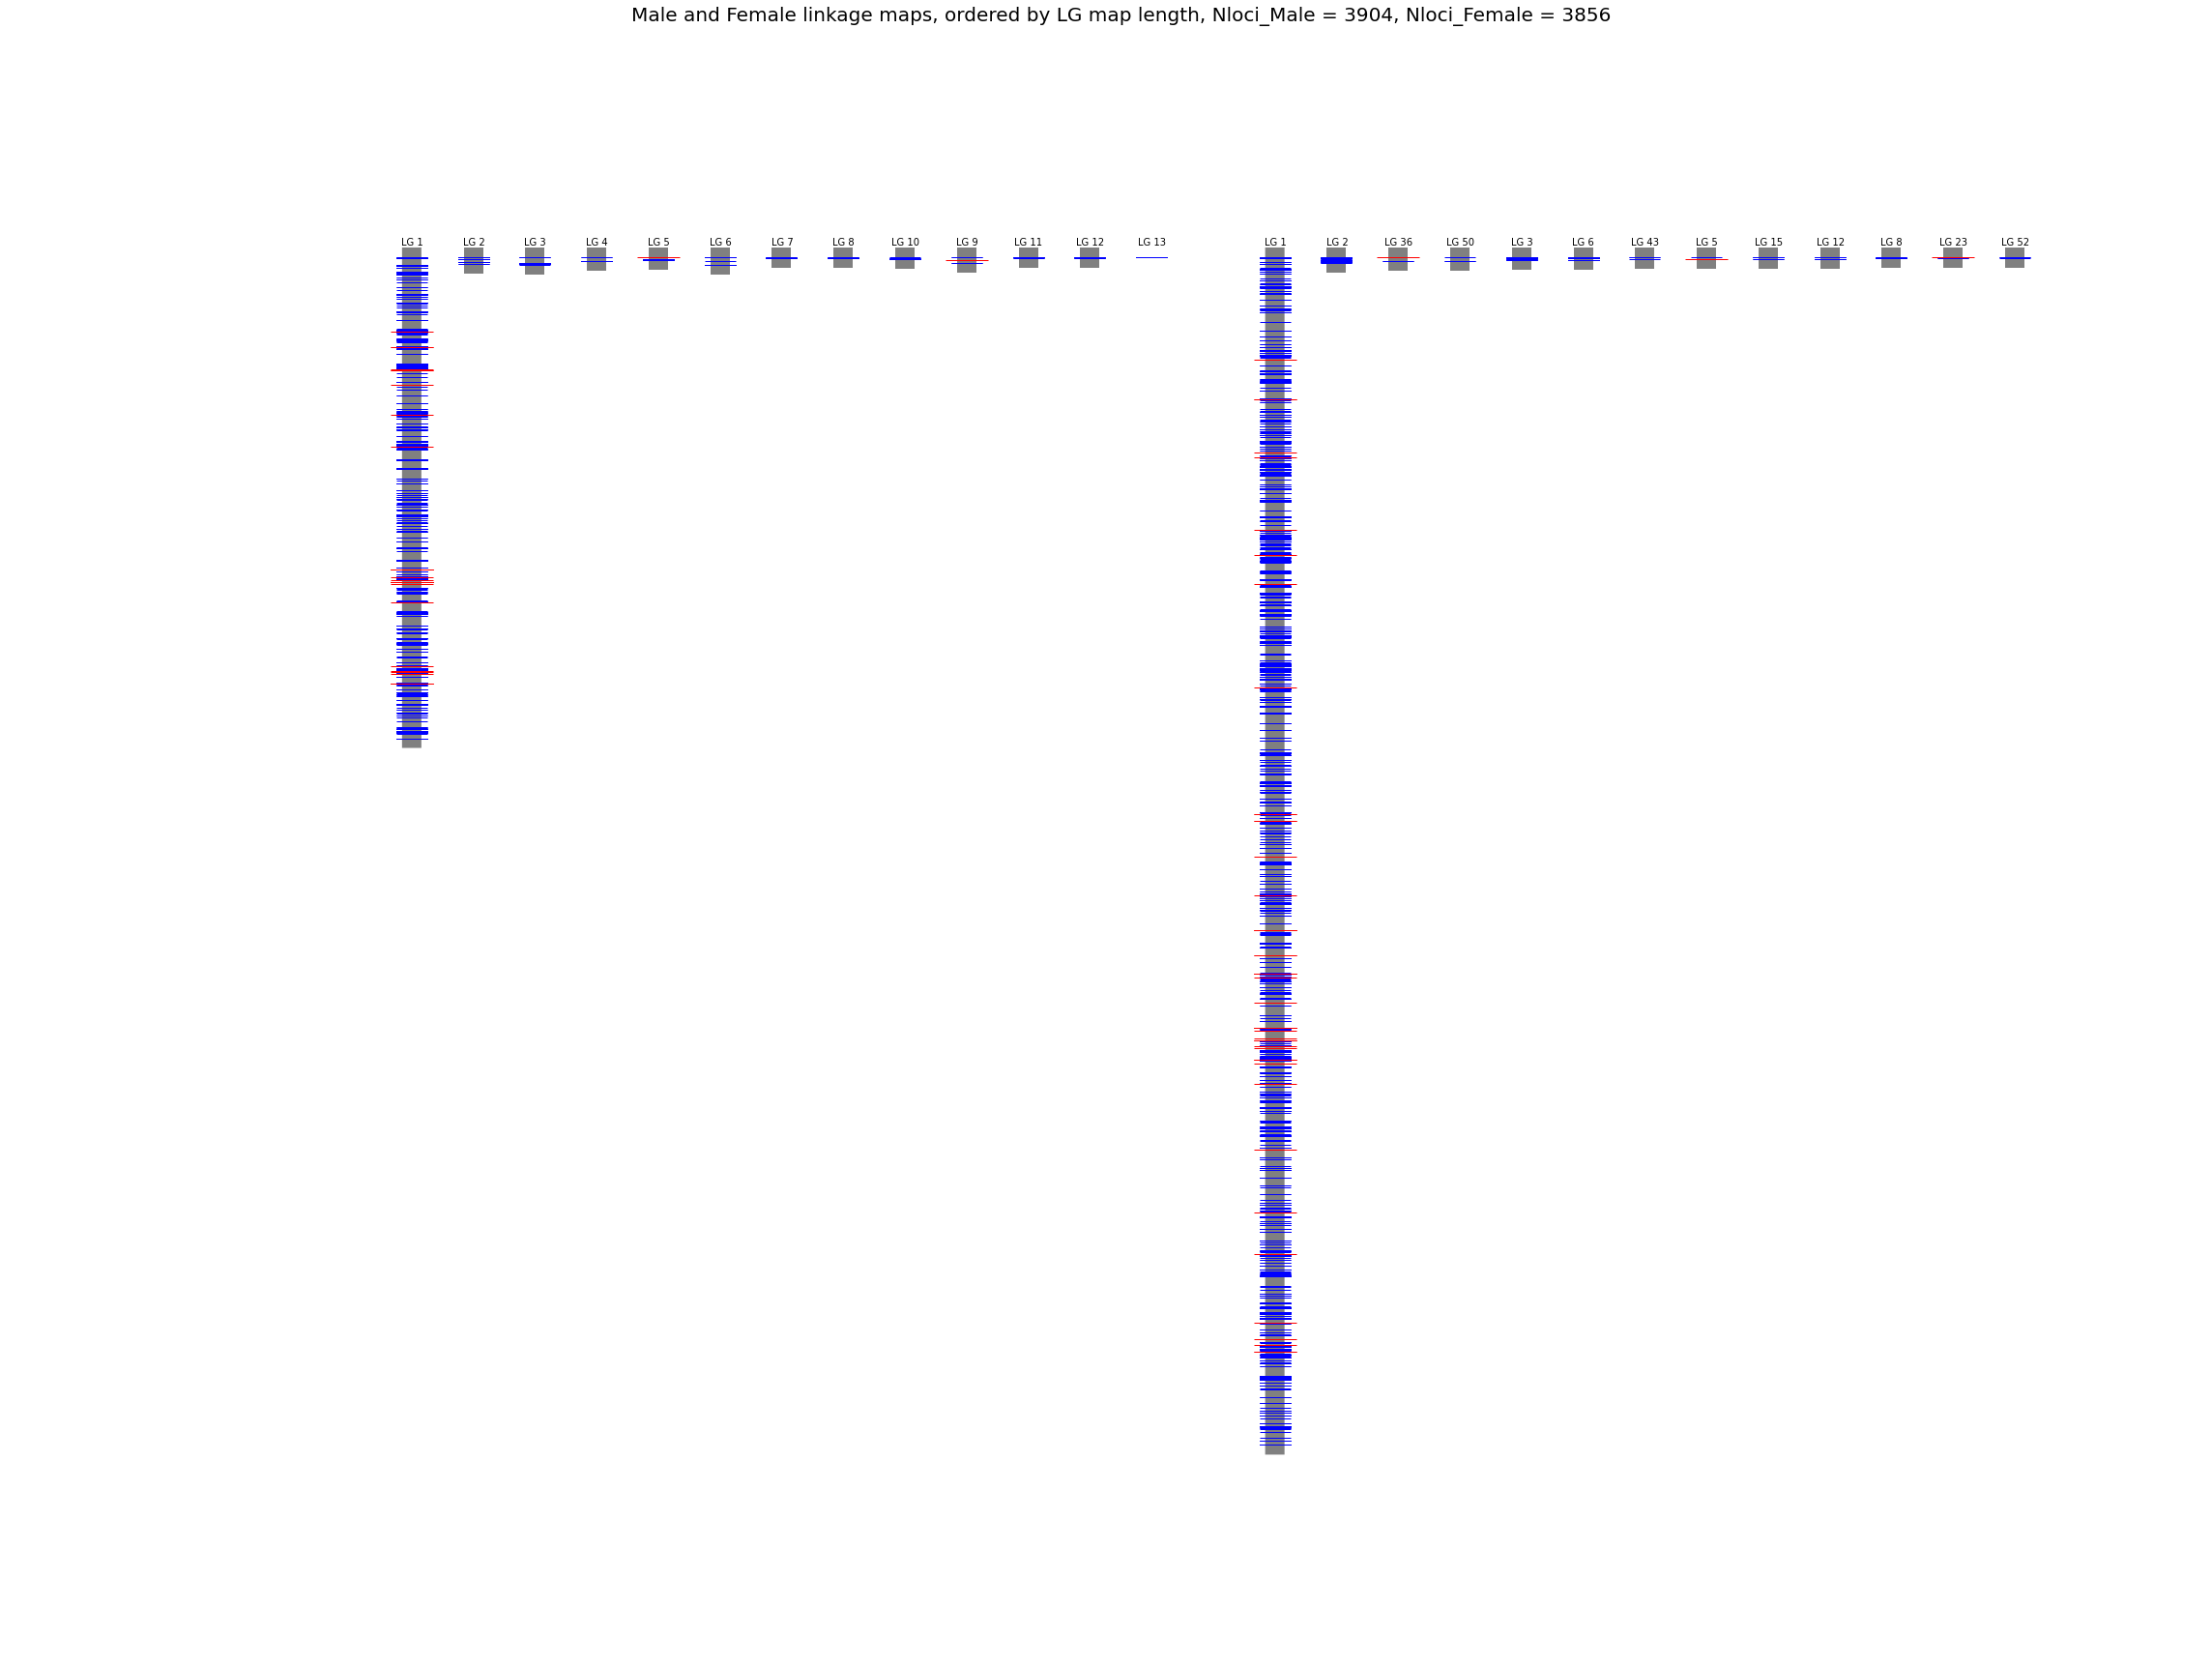

In [17]:
LEPmap_outpath = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Linkage_maps/Combined/LOD_3_4/MAP_LOD_3_ordered1_max_dist04.txt"

Sexy_LEPmap_plotter(LEPmap_outpath, 3, Bv_numbers, "D", 13, 100, "Both_sexes_map.pdf")

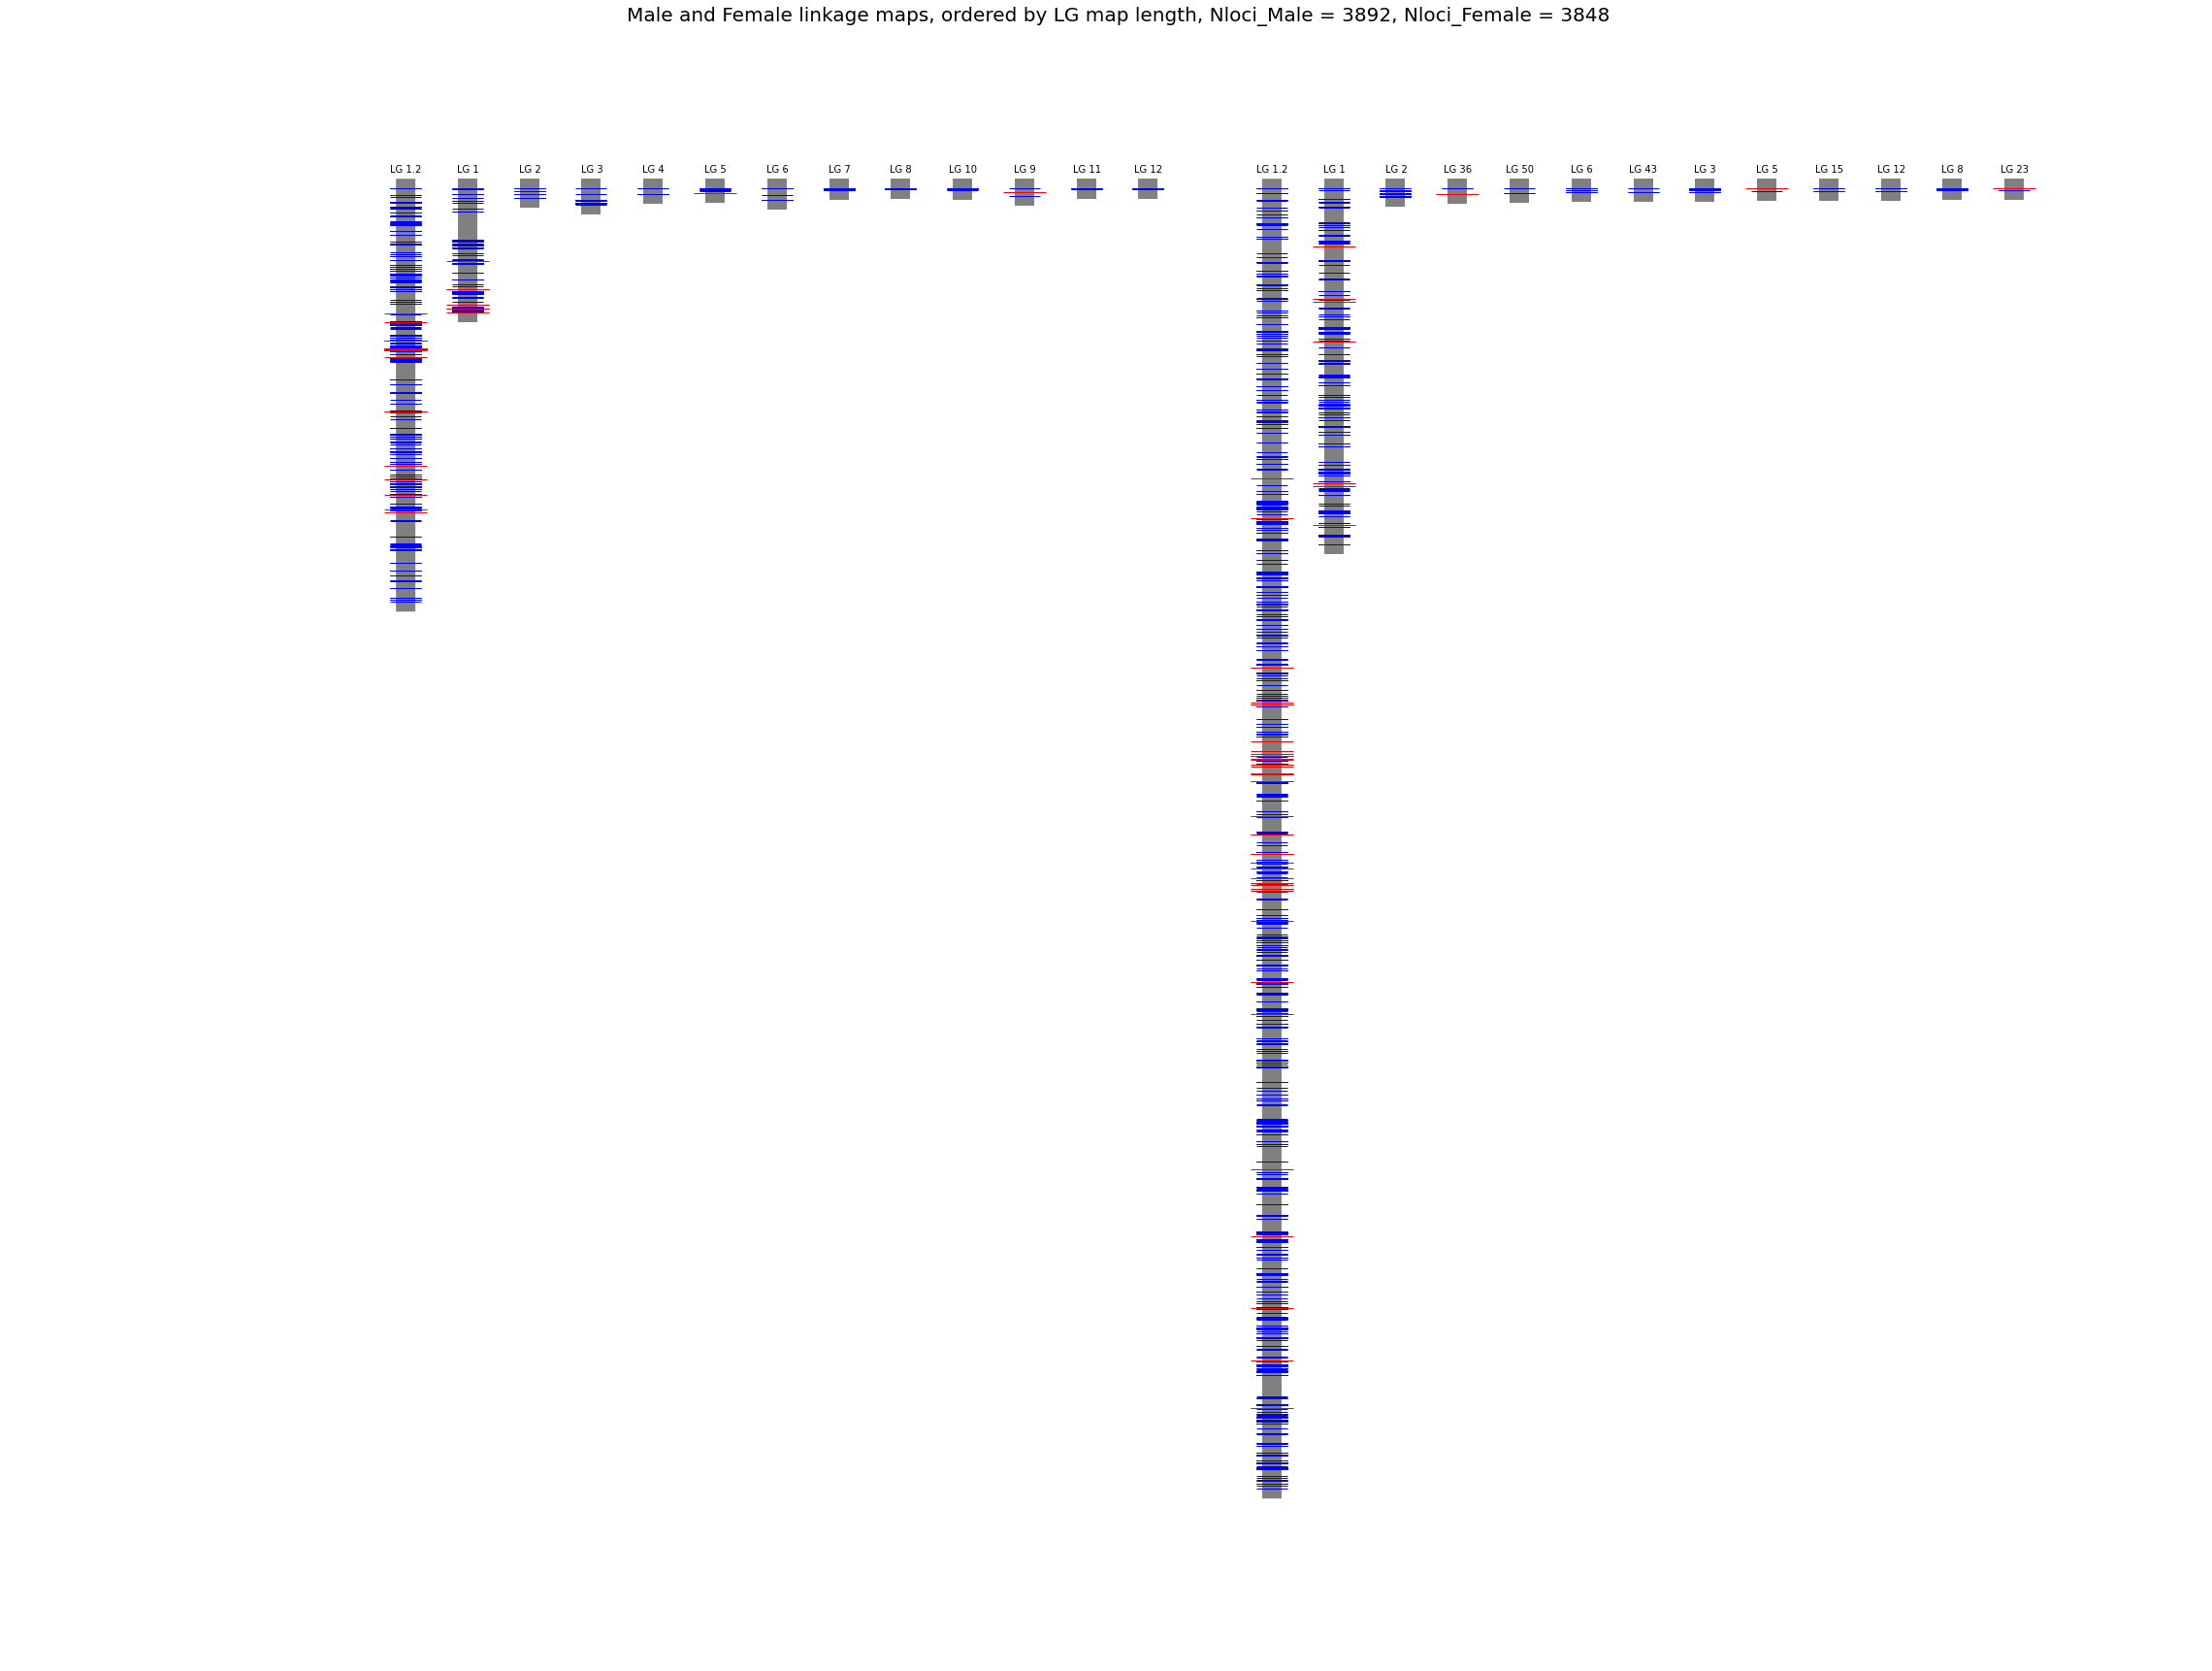

In [18]:
LEPmap_outpath = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Linkage_maps/Combined/LOD_3_4/MAP_LOD_3_ordered1.txt"

Sexy_LEPmap_plotter(LEPmap_outpath, 3, Bv_numbers, "D", 13, 100, "Both_sexes_map.pdf")

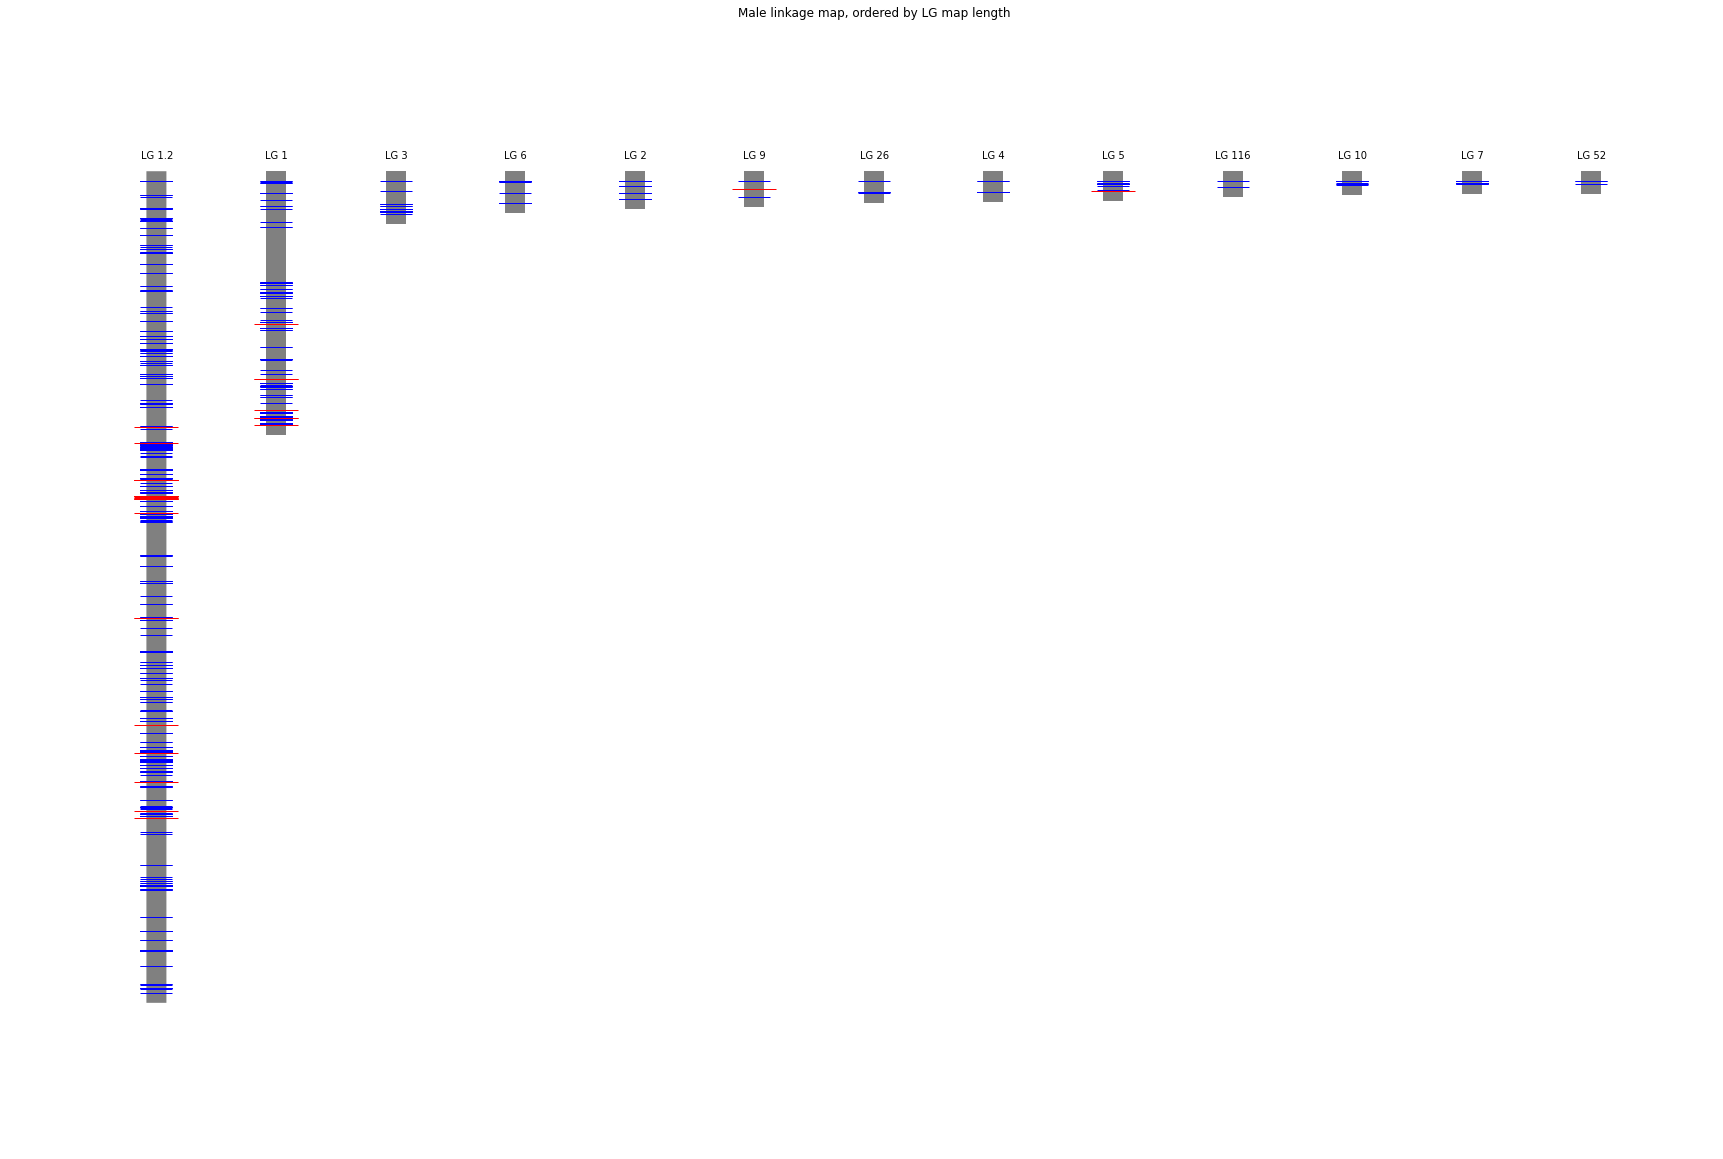

In [92]:
LEPmap_outpath = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Linkage_maps/Combined/LOD_3_4/MAP_LOD_3_ordered1.txt"

Sexy_LEPmap_plotter(LEPmap_outpath, 1, Bv_numbers, "D", 13, 70)

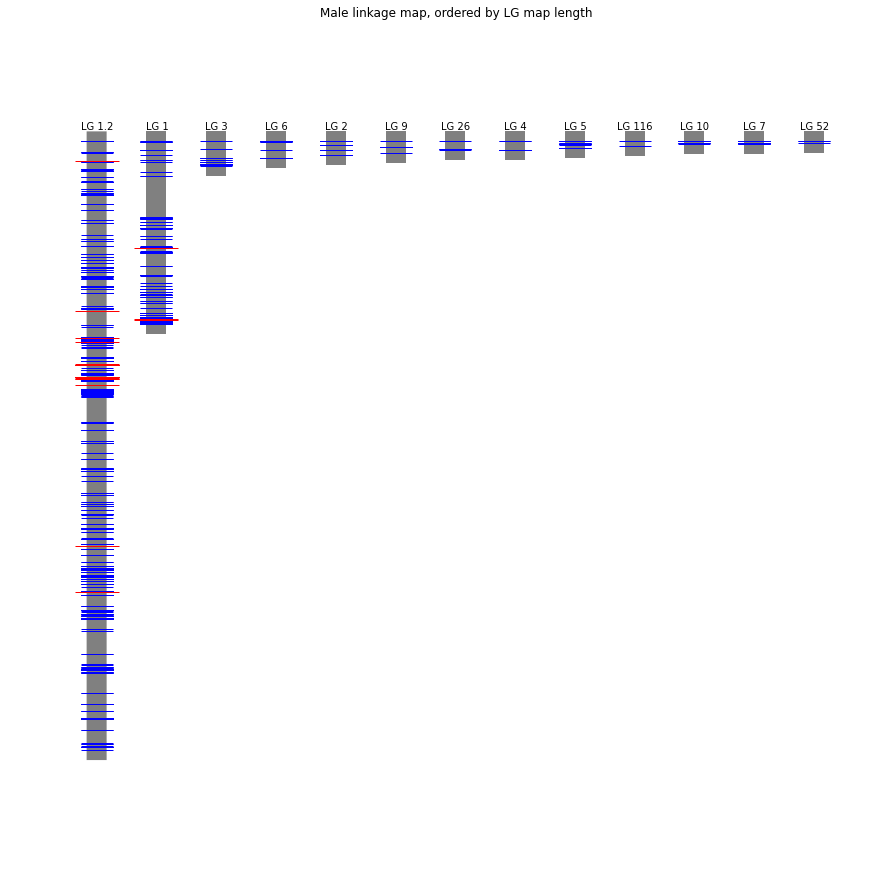

In [25]:
LEPmap_outpath = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Linkage_maps/Combined/LOD_3_4/MAP_LOD_3_ordered1.txt"

M_LGs = Sexy_LEPmap_plotter(LEPmap_outpath, 1, _93x94_numbers, "D", 13, 50)

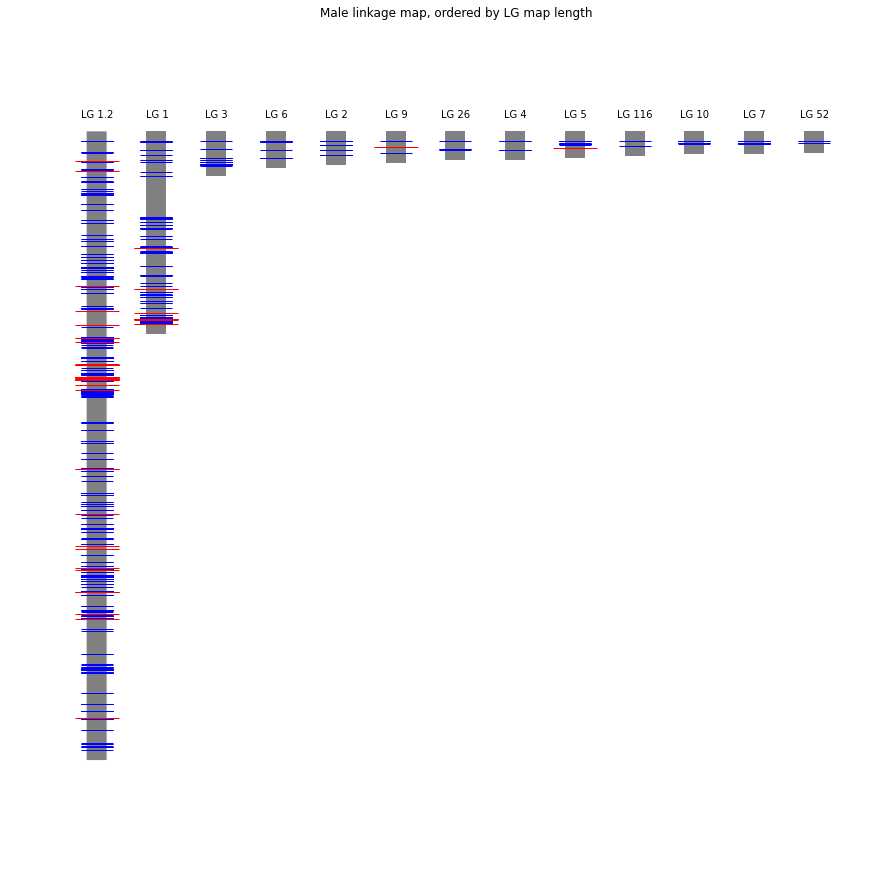

In [26]:
All_numbers = set(Bv_numbers + GR_96x97_numbers + _93x94_numbers)

LEPmap_outpath = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Linkage_maps/Combined/LOD_3_4/MAP_LOD_3_ordered1.txt"

M_LGs = Sexy_LEPmap_plotter(LEPmap_outpath,1, All_numbers, "D", 13, 100)

### Female_maps

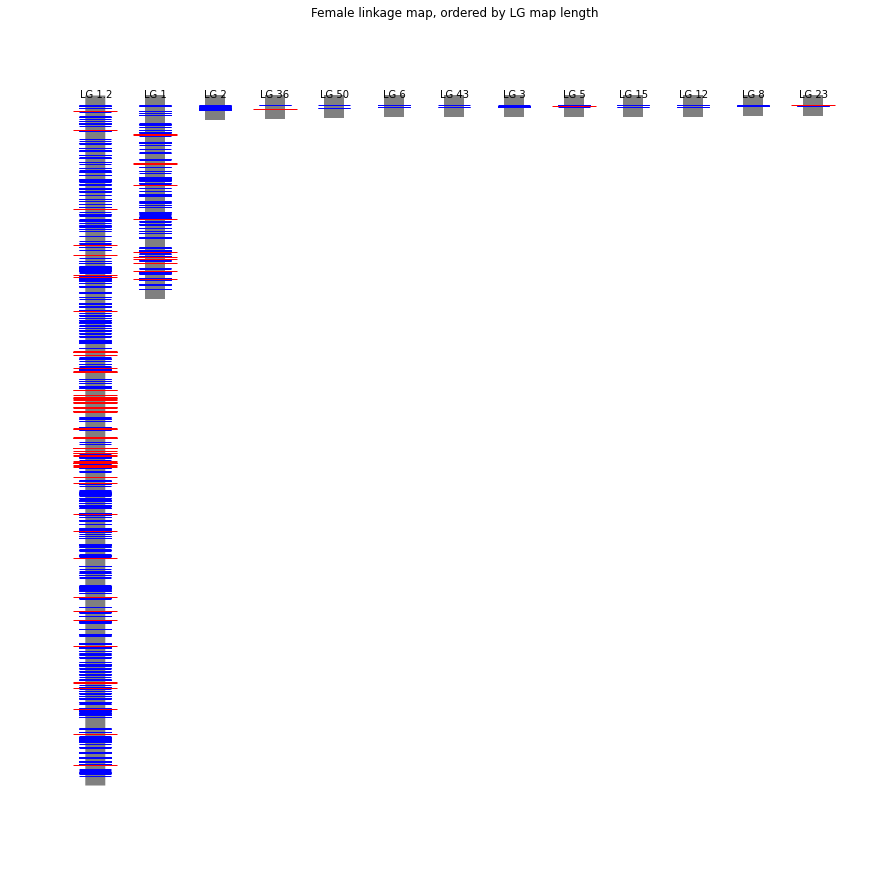

In [31]:

LEPmap_outpath = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Linkage_maps/Combined/LOD_3_4/MAP_LOD_3_ordered1.txt"

F_LGs = Sexy_LEPmap_plotter(LEPmap_outpath, 2, All_numbers, "D", 13, 100)

Male and female together . . . 

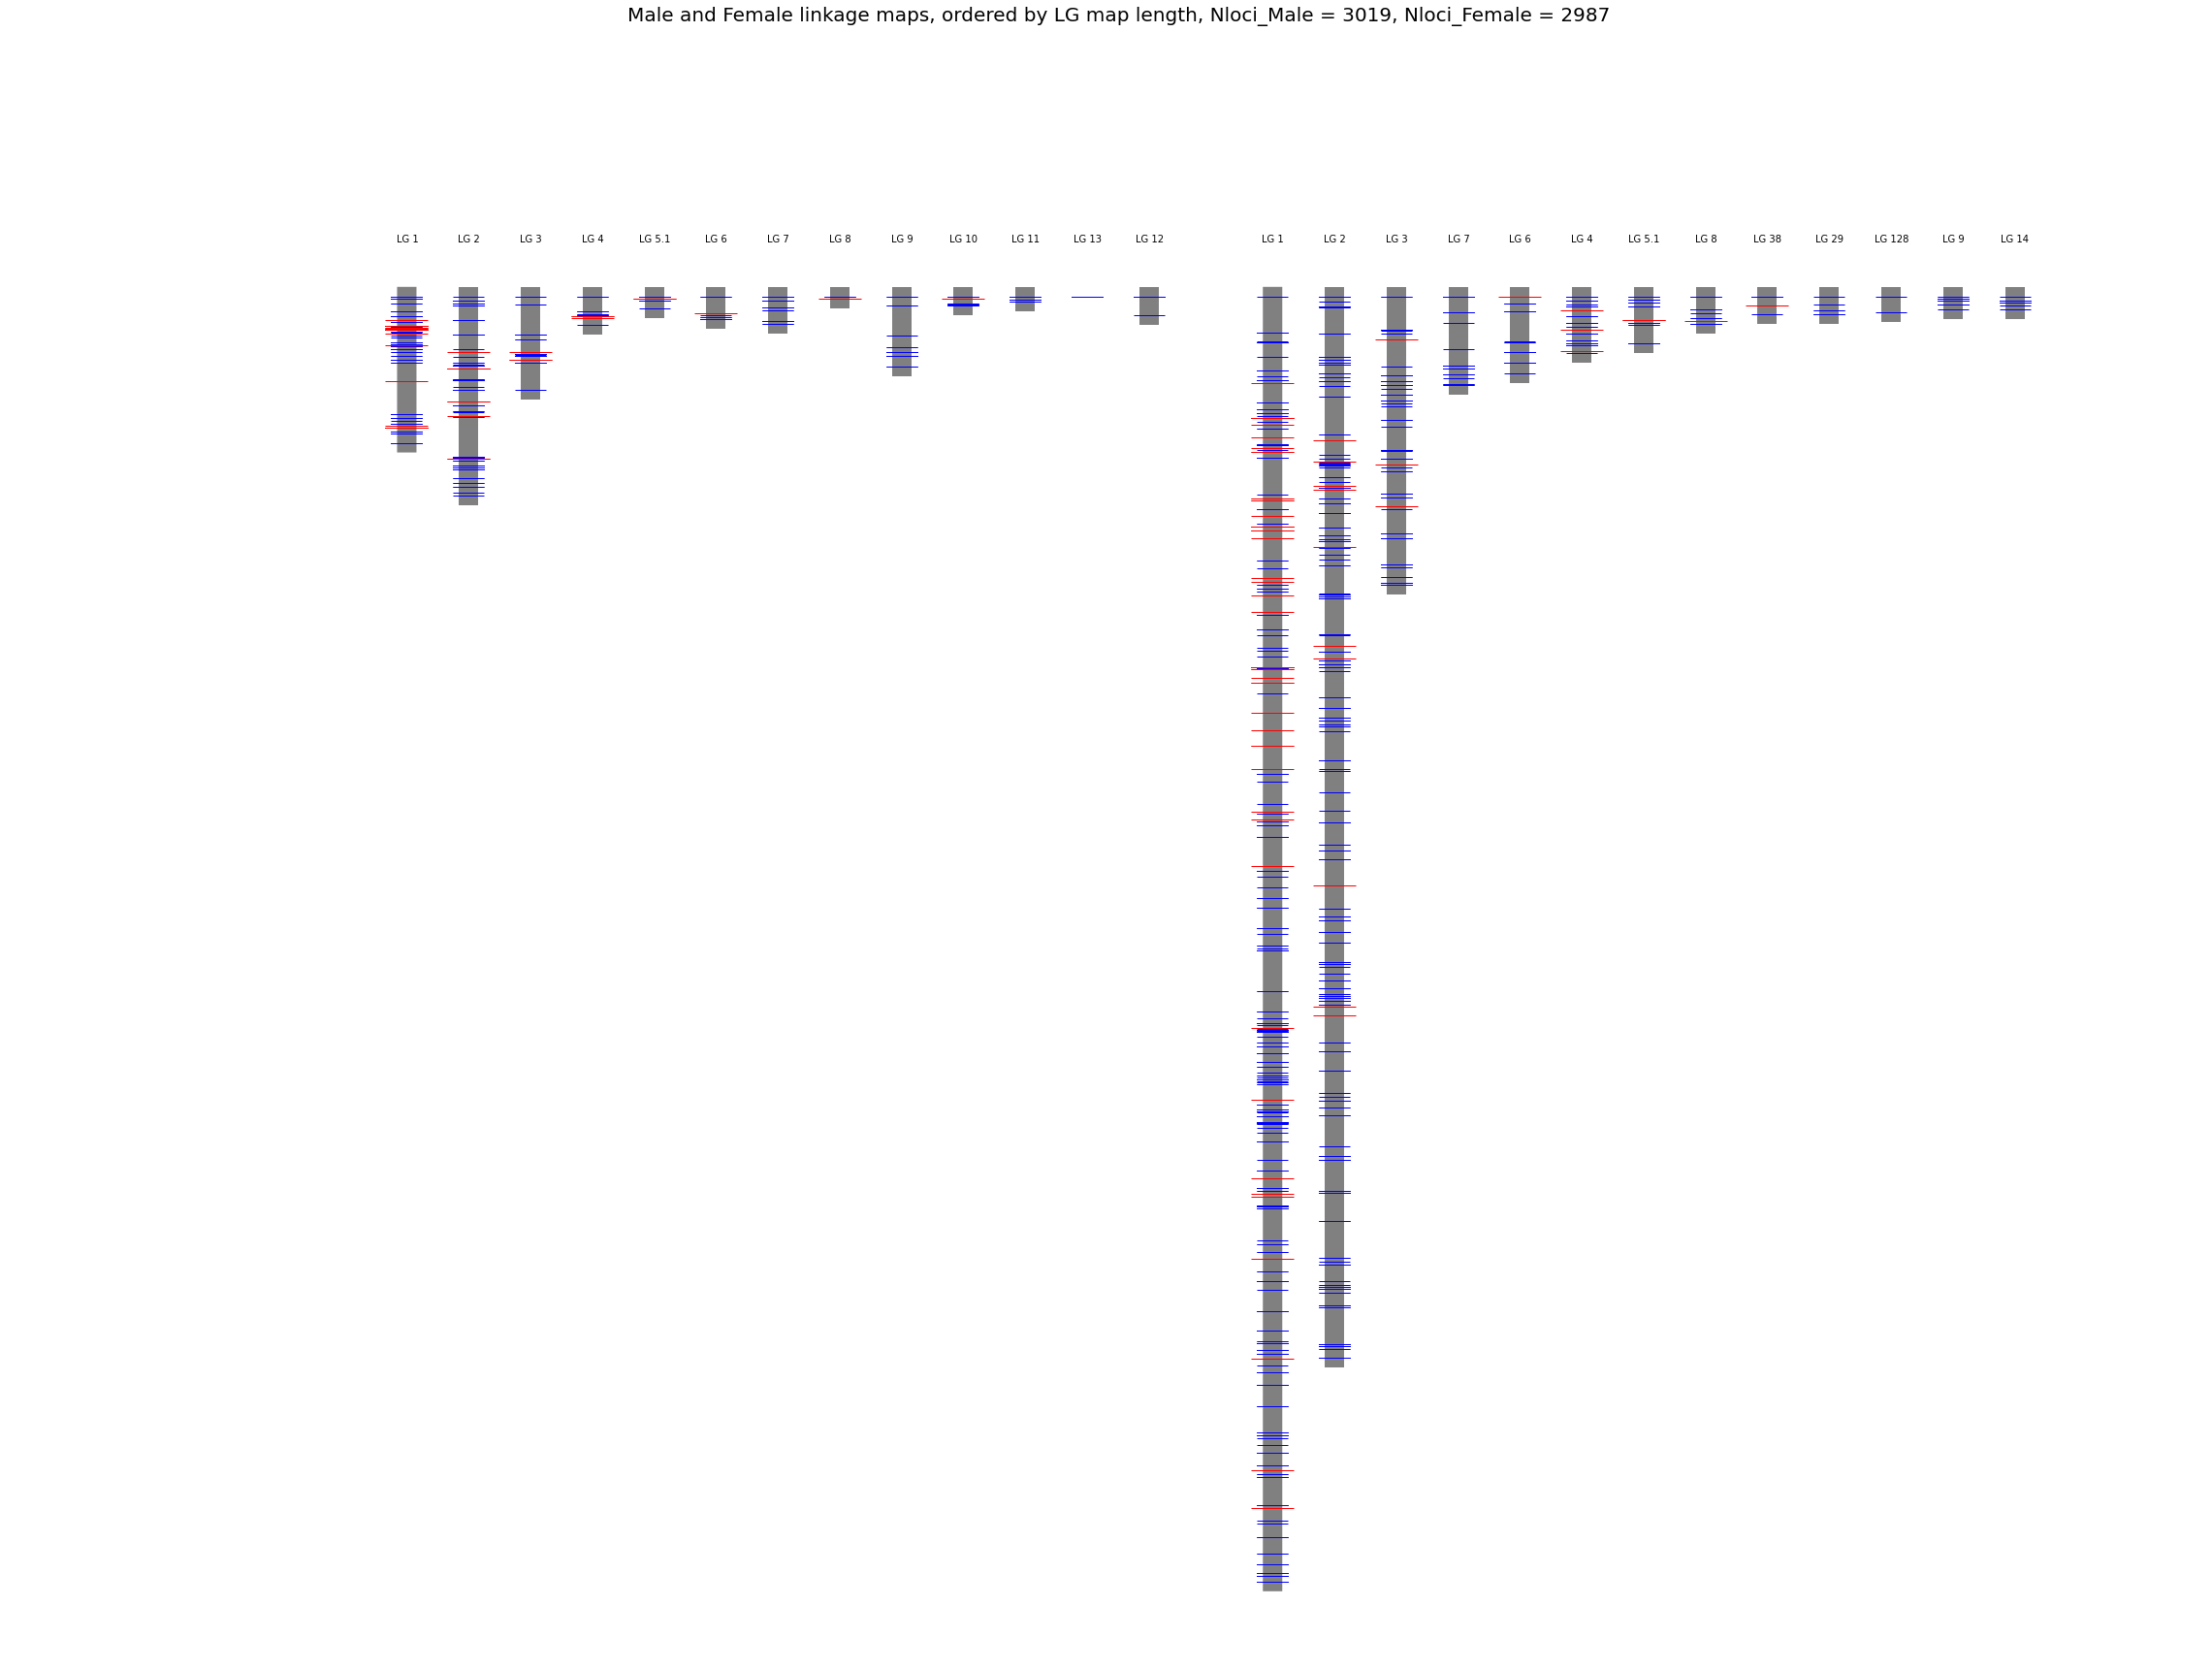

In [115]:

LEPmap_outpath = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Linkage_maps/Combined/LOD_test/MAP_LOD_3-5_ordered1.txt"

Sexy_LEPmap_plotter(LEPmap_outpath, 3, All_numbers, "D", 13, 100, "Both_sexes_map_LOD_4.pdf")

## LOD 6

In [23]:
help(Sexy_LEPmap_plotter)

Help on function Sexy_LEPmap_plotter in module __main__:

Sexy_LEPmap_plotter(LEPmap_out, sex, Interesting_markers, length_measure='D', N_LGs=10, axis_offset=10, plot_out_name='LEP_map_plot.pdf')
    LEPmap_out        - Path to outfile of ordered markers in LGs from the "OrderMarkers" module of LEPmap
    sex               - Sex for which to plot map 1 = male, 2 = female, use 3 for both sna 4 for sex-averaged maps. 
    length_measure    - Order linkage groups by number of SNPs in each LG "S" or by the distance "D"
    N_LGs             - Number of linkage groups to plot (will plot up to the Nth best LGs in terms of length)
    axis_offset       - Parameter to control the position of the linkage group labels.



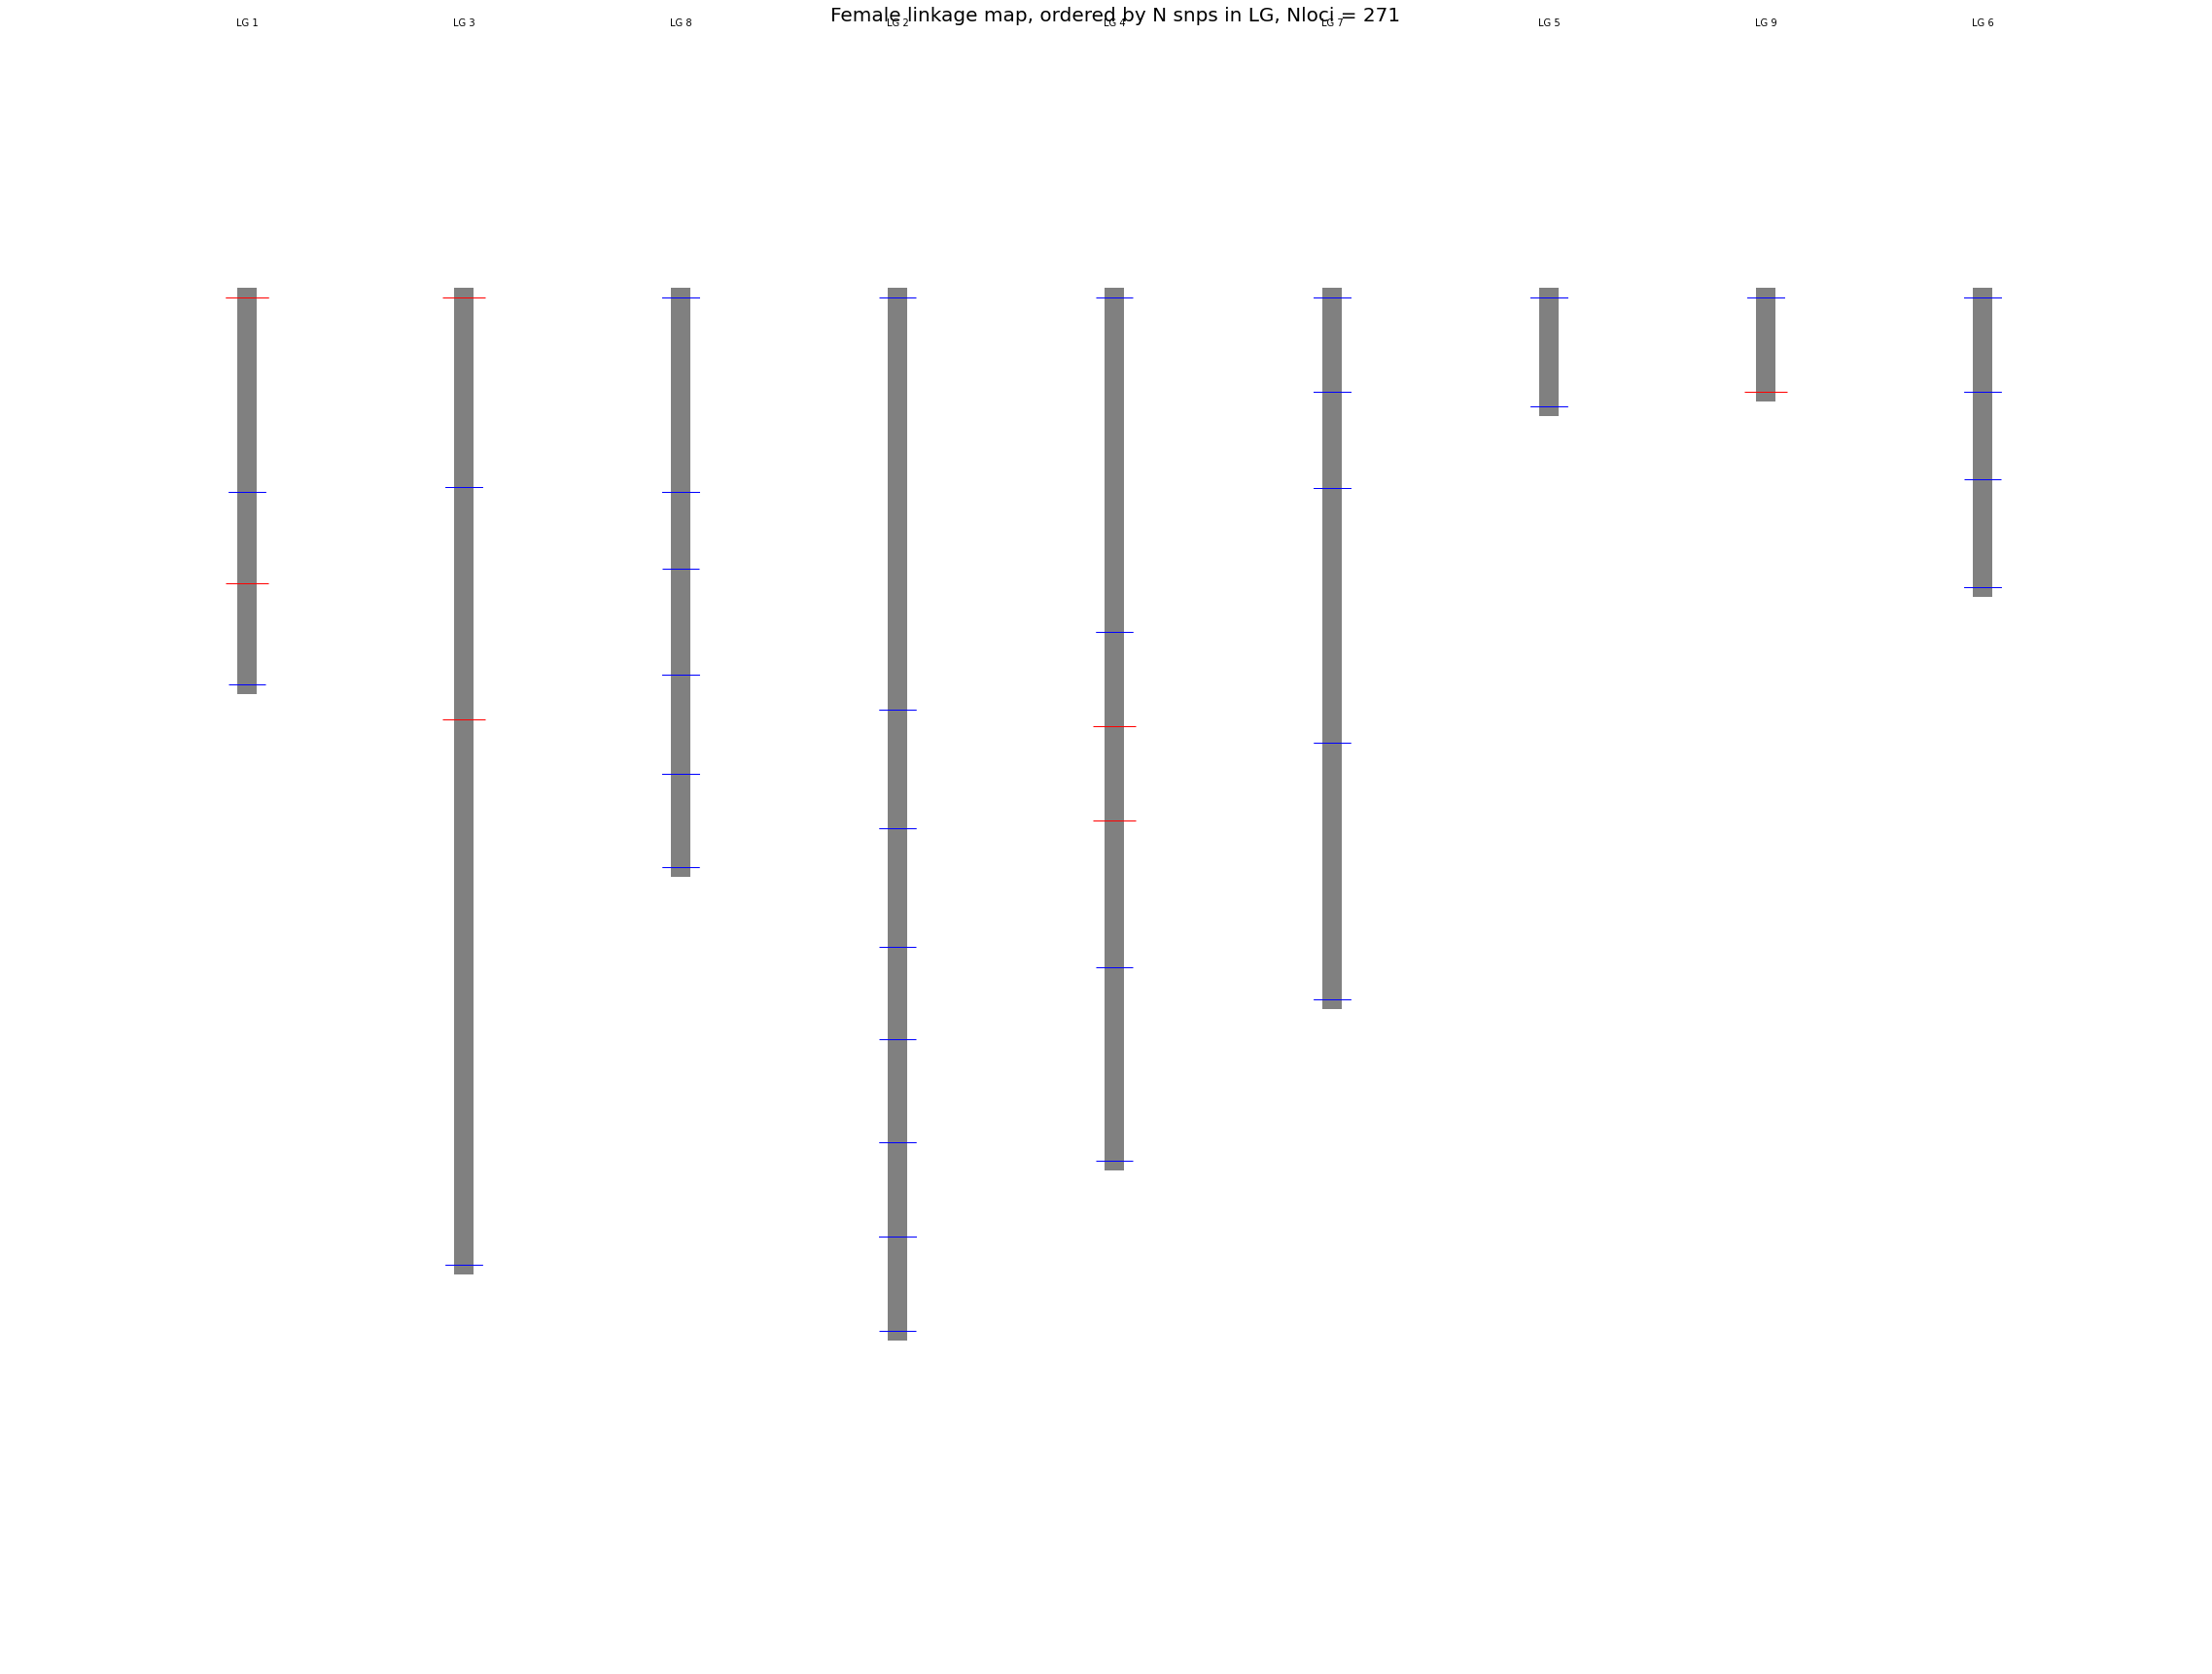

In [43]:

LEPmap_outpath = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Linkage_maps/High_LOD_maps/FAM_3_only/MAP_LOD_5_js_4.5_ordered1.txt"

Sexy_LEPmap_plotter(LEPmap_outpath, 2, All_numbers, "S", 20, 10, "Both_sexes_map_LOD_5_js_4_5.pdf")

In [35]:
All_numbers

{9,
 102,
 265,
 275,
 556,
 905,
 927,
 956,
 1074,
 1134,
 1137,
 1138,
 1195,
 1283,
 1333,
 1350,
 1377,
 1524,
 1543,
 1816,
 1902,
 1917,
 1934,
 1935,
 1968,
 1999,
 2066,
 2067,
 2161,
 2179,
 2421,
 2453,
 2506,
 2697,
 2725,
 2802,
 2805,
 2806,
 2886,
 2897,
 2917,
 2937,
 2946,
 2989,
 3061,
 3062,
 3078,
 3184,
 3261,
 3397,
 3444,
 3490,
 3491,
 3547,
 3588,
 3589,
 3595,
 3634,
 3680,
 3719,
 3776,
 3781,
 4007,
 4049,
 4150,
 4152,
 4216,
 4235,
 4299,
 4349,
 4402,
 4468,
 4483,
 4497,
 4573,
 4574,
 4575,
 4588,
 4604,
 4730,
 4816,
 4851,
 4927,
 4928,
 4945,
 5111,
 5177,
 5284,
 5323,
 5336,
 5337,
 5396,
 5484,
 5536,
 5548,
 5794,
 5975,
 5991,
 6039,
 6229,
 6230,
 6301,
 6436,
 6442,
 6505,
 6683,
 6818,
 6958,
 6959,
 7023,
 7078,
 7079,
 7118,
 7120,
 7137,
 7182,
 7187,
 7239,
 7240,
 7274,
 7393,
 7394,
 7444,
 7579,
 7598,
 7736,
 7776,
 7778,
 7899,
 8066,
 8118,
 8152,
 8153,
 8170,
 8203,
 8401,
 8567,
 8606,
 8638,
 8639,
 8763,
 8764,
 8815,
 8872,
 8

In [38]:
## Make the input for "genetic-mapper" for visualisation:

MAP_file = open("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Linkage_maps/High_LOD_maps/FAM_3_only/MAP_LOD_5_js_4.5_ordered1.txt", 'r').readlines()
genetic_mapper_input_FEM = open("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Linkage_maps/High_LOD_maps/FAM_3_only/MAP_LOD_5_js_4.5_FEMALE.txt", 'w')
genetic_mapper_input_MAL = open("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Linkage_maps/High_LOD_maps/FAM_3_only/MAP_LOD_5_js_4.5_MALE.txt", 'w')
for line in MAP_file:
    if line.startswith("#***"):
        LG = line.split()[3]
    elif not line.startswith("#"):
        Marker_ID = line.split()[0]
        Fem_POS = line.split()[2]
        Male_POS = line.split()[1]
        genetic_mapper_input_FEM.write("%s\t%s\t%s\n" % (Marker_ID, LG, Fem_POS))
        genetic_mapper_input_MAL.write("%s\t%s\t%s\n" % (Marker_ID, LG, Male_POS))
    
genetic_mapper_input_FEM.close()
genetic_mapper_input_MAL.close()
        




### Now I want to get all the markers in the first LG for mapping on the genome. . . .

1. Find the marker number in the map
2. convert the marker number into a snp_ID in the vcf
3. get the seqs using those snp_IDs from the catalog

In [1]:
LEPmap_outpath = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Linkage_maps/Combined/LOD_test/MAP_LOD_3-5_ordered1.txt"
LEPmap_out = open(LEPmap_outpath, 'r').readlines()

In [9]:
LG_of_interest = "1"
LG = "0"

LG_X_marker_numbers = []

for line in LEPmap_out:
    if "LG = " in line:
        LG = line.split()[3]
        
    if LG == LG_of_interest and "#" not in line:
        LG_X_marker_numbers.append(line.split()[0]) ## just take the tag ID
print "%s markers on LG1" % len(LG_X_marker_numbers)

1365 markers on LG1


### Now make fasta from the catalog using only these markers.

In [30]:
import gzip

catalog = gzip.open("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_stacks_outs/batch_1.catalog.tags.tsv.gz", 'r').readlines()
fasta_out = open("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/LG_markers/LG1_tags.fasta", 'w')


for line in catalog:
    if not line.startswith("#"):
        tag_ID = line.split()[2]
        if tag_ID in LG_X_marker_numbers:
            seq = line.split()[8]
            fasta_out.write(">%s\n%s\n" % (tag_ID, seq))

fasta_out.close()





yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


### Now blast these against the nanorana genome and keep confident hits!

#### First Nanorana

In [35]:
from MISC_RAD_tools import BlastParseExtra

blastouts = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/LG_markers/Blast_outputs_Nanorana.xml"
Genome = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Nanorana_blast_db/Nanorana_parkeri.genome.v2.fasta"
eval_diff = 1e-5
min_eval = 1e-20
window = 100000

BlastParseExtra(blastouts, Genome, eval_diff, min_eval, window)

Number of multi-alingments kept: 0
Number of unique alingments kept: 5
Getting subject scaffold segments from /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Nanorana_blast_db/Nanorana_parkeri.genome.v2.fasta . . . 
5 sequence scaffold segments are in /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/LG_markers/blast_100000_chunks.fa


{u'12852': {'Evalue': 4.58664e-31,
  'Hit_end_coord': 411221,
  'Hit_start_coord': 411309,
  'Ref_hit_id': 'scaffold122'},
 u'4214': {'Evalue': 1.29343e-21,
  'Hit_end_coord': 1046334,
  'Hit_start_coord': 1046245,
  'Ref_hit_id': 'scaffold89'},
 u'6038': {'Evalue': 5.89137e-35,
  'Hit_end_coord': 139829,
  'Hit_start_coord': 139918,
  'Ref_hit_id': 'scaffold1158'},
 u'7523': {'Evalue': 5.89137e-35,
  'Hit_end_coord': 66635,
  'Hit_start_coord': 66543,
  'Ref_hit_id': 'scaffold51'},
 u'9573': {'Evalue': 3.54569e-32,
  'Hit_end_coord': 250962,
  'Hit_start_coord': 250887,
  'Ref_hit_id': 'scaffold907'}}

#### Now Xenopus

In [32]:
from MISC_RAD_tools import BlastParseExtra

blastouts = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/LG_markers/Blast_outputs_Xenopus.xml"
Genome = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenopus_genome/Xtropicalis.v9.repeatMasked.fa"
eval_diff = 1e-5
min_eval = 1e-10
window = 100000

BlastParseExtra(blastouts, Genome, eval_diff, min_eval, window)

Number of multi-alingments kept: 0
Number of unique alingments kept: 5
Getting subject scaffold segments from /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenopus_genome/Xtropicalis.v9.repeatMasked.fa . . . 
5 sequence scaffold segments are in /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/LG_markers/blast_100000_chunks.fa


{u'1568': {'Evalue': 9.2174e-17,
  'Hit_end_coord': 163118192,
  'Hit_start_coord': 163118257,
  'Ref_hit_id': 'Chr02'},
 u'2271': {'Evalue': 3.36241e-06,
  'Hit_end_coord': 153092535,
  'Hit_start_coord': 153092569,
  'Ref_hit_id': 'Chr01'},
 u'544': {'Evalue': 1.16731e-30,
  'Hit_end_coord': 3293319,
  'Hit_start_coord': 3293229,
  'Ref_hit_id': 'Chr04'},
 u'6073': {'Evalue': 1.19235e-15,
  'Hit_end_coord': 33017492,
  'Hit_start_coord': 33017444,
  'Ref_hit_id': 'Chr07'},
 u'9573': {'Evalue': 1.51001e-29,
  'Hit_end_coord': 124419204,
  'Hit_start_coord': 124419277,
  'Ref_hit_id': 'Chr02'}}

In [36]:
from MISC_RAD_tools import BlastParseExtra

blastouts = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/LG_markers/Nan_to_Xen_Blast_outputs.xml"
Genome = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenopus_genome/Xtropicalis.v9.repeatMasked.fa"
eval_diff = 1e-5
min_eval = 1e-10
window = 100000

BlastParseExtra(blastouts, Genome, eval_diff, min_eval, window)

Number of multi-alingments kept: 3
Number of unique alingments kept: 0
Getting subject scaffold segments from /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenopus_genome/Xtropicalis.v9.repeatMasked.fa . . . 
3 sequence scaffold segments are in /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/LG_markers/blast_100000_chunks.fa


{u'scaffold1158': {'Evalue': 0.0,
  'Hit_end_coord': 63040084,
  'Hit_start_coord': 63036533,
  'Ref_hit_id': 'Chr03'},
 u'scaffold51': {'Evalue': 9.38808e-102,
  'Hit_end_coord': 40433394,
  'Hit_start_coord': 40433927,
  'Ref_hit_id': 'Chr07'},
 u'scaffold907': {'Evalue': 0.0,
  'Hit_end_coord': 124419152,
  'Hit_start_coord': 124419813,
  'Ref_hit_id': 'Chr02'}}